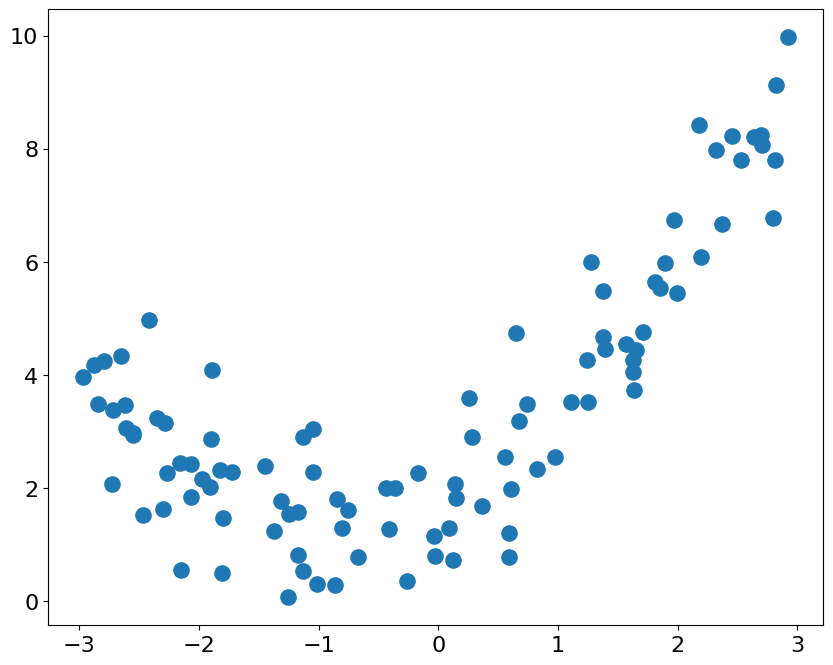

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

plt.figure(figsize=(10, 8))
plt.scatter(x, y, s=120)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

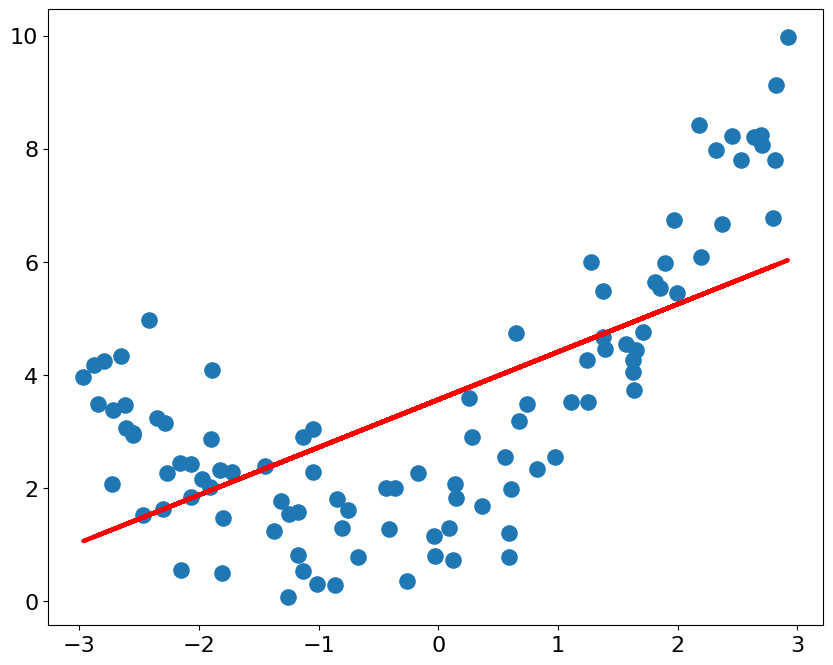

In [2]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_predict = lin_reg.predict(X)

plt.figure(figsize=(10, 8))
plt.scatter(x, y, s=120)
plt.plot(x, y_predict, color='r', linewidth=3)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

(100, 1)
(100, 2)


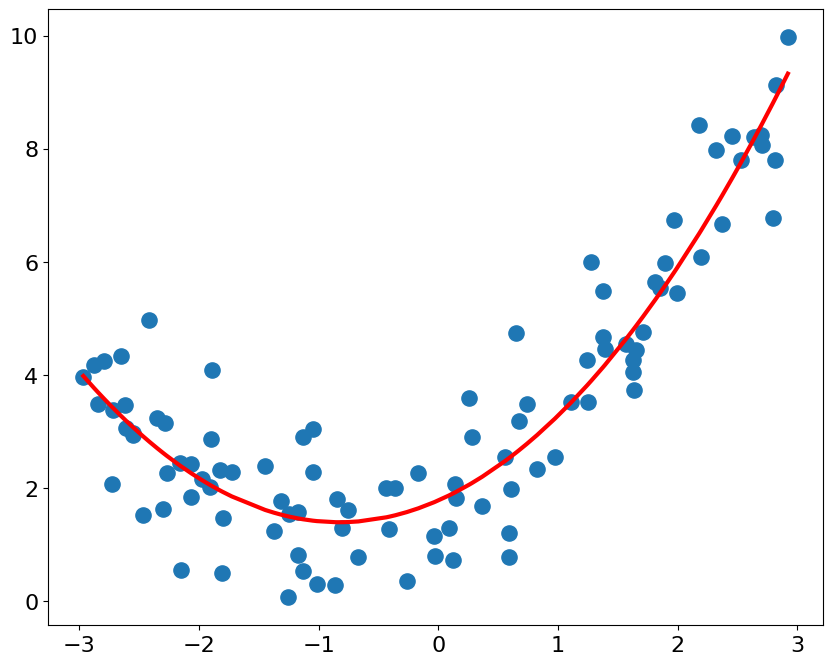

In [3]:
print((X ** 2).shape)
X2 = np.hstack([X, X ** 2])
print(X2.shape)
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

plt.figure(figsize=(10, 8))
plt.scatter(x, y, s=120)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r', linewidth=3)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [4]:
print(lin_reg2.coef_)
print(lin_reg2.intercept_)

[0.93366893 0.56456263]
1.7813458120291457


In [5]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)
print(X2.shape)
print(X2[:2, :])
print(X[:2, :])

(100, 3)
[[ 1.         -0.75275929  0.56664654]
 [ 1.          2.70428584  7.3131619 ]]
[[-0.75275929]
 [ 2.70428584]]


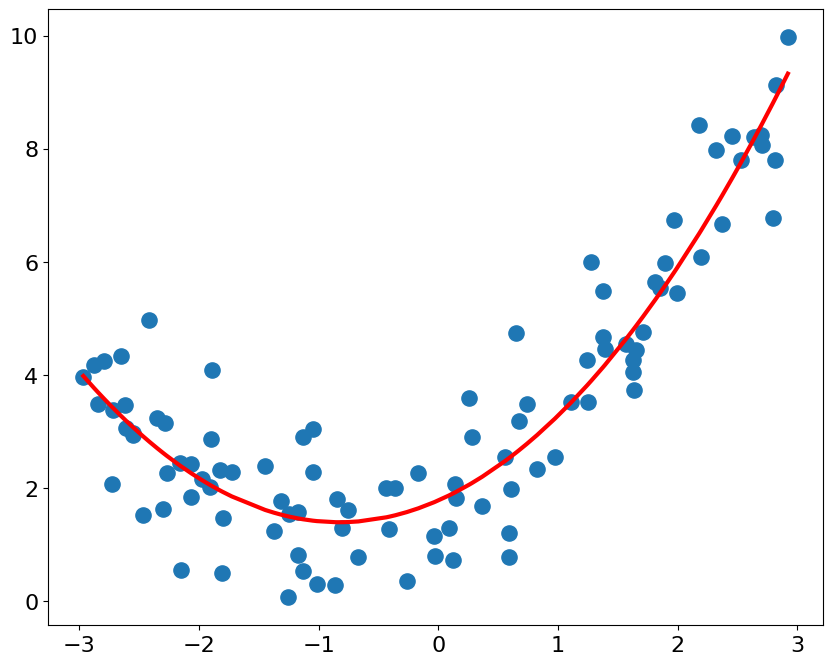

In [7]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

plt.figure(figsize=(10, 8))
plt.scatter(x, y, s=120)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r', linewidth=3)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [10]:
X = np.arange(1, 7).reshape(-1, 2)
print(X.shape)
print(X)

(3, 2)
[[1 2]
 [3 4]
 [5 6]]


In [11]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)
print(X2.shape)
print(X2)

(3, 6)
[[ 1.  1.  2.  1.  2.  4.]
 [ 1.  3.  4.  9. 12. 16.]
 [ 1.  5.  6. 25. 30. 36.]]


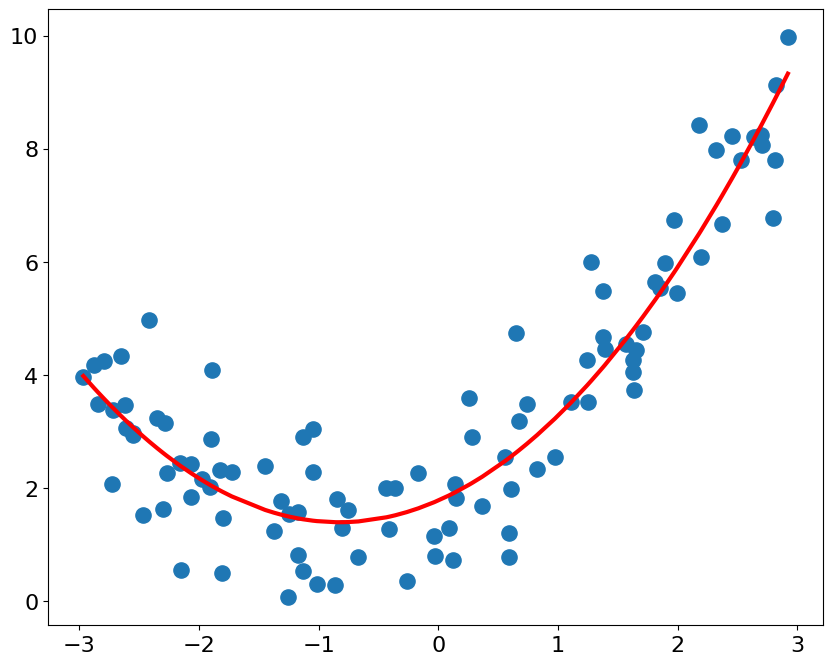

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, 100)

poly_reg = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('std_scaler', StandardScaler()),
    ('lin_reg', LinearRegression())
])

poly_reg.fit(X, y)
y_predict2 = poly_reg.predict(X)

plt.figure(figsize=(10, 8))
plt.scatter(x, y, s=120)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r', linewidth=3)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error

np.random.seed(42)
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, 100)

lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_predict = lin_reg.predict(X)

mean_squared_error(y, y_predict)

3.0245639566396174

In [21]:
def PolynomialRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('lin_reg', LinearRegression())
    ])

In [22]:
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X, y)
y2_predict = poly2_reg.predict(X)
print(mean_squared_error(y, y2_predict))

0.7771936663502366


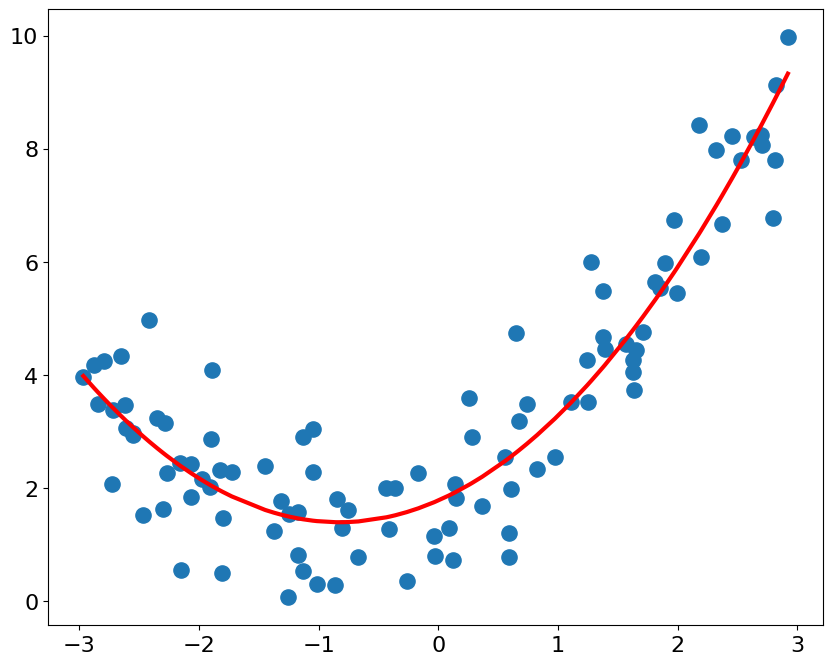

In [41]:
def plot_lin_reg(x, y, y_hat):
    plt.figure(figsize=(10, 8))
    plt.scatter(x, y, s=120)
    plt.plot(np.sort(x), y_hat[np.argsort(x)], color='r', linewidth=3)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()
    
plot_lin_reg(x, y, y2_predict)

0.7399087981911192


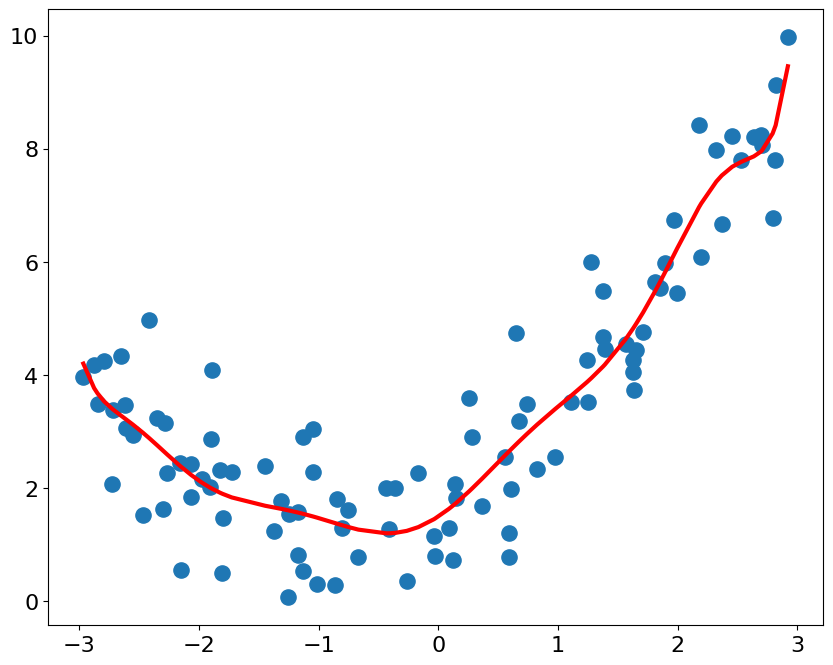

In [42]:
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X, y)
y10_predict = poly10_reg.predict(X)
print(mean_squared_error(y, y10_predict))
plot_lin_reg(x, y, y10_predict)

0.43488627217218373


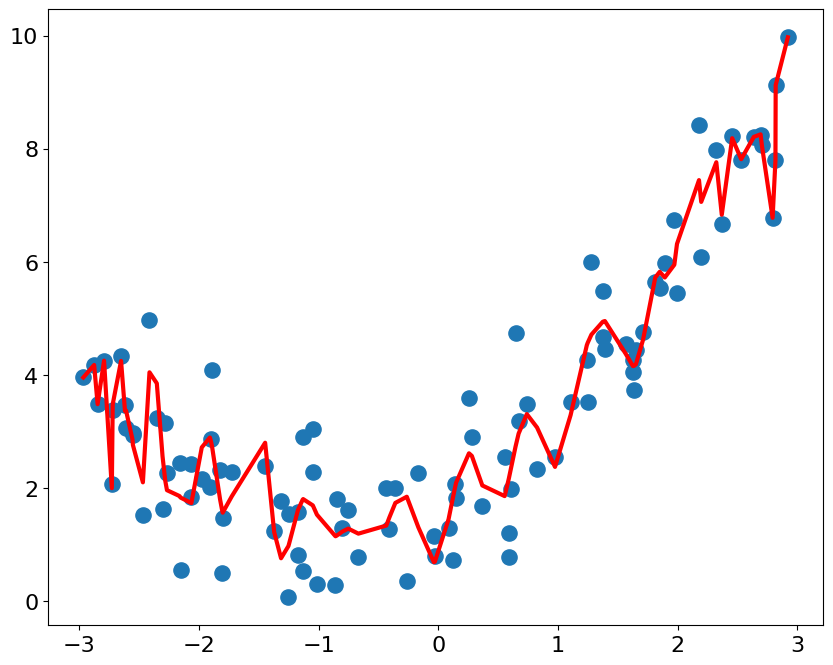

In [43]:
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X, y)
y100_predict = poly100_reg.predict(X)
print(mean_squared_error(y, y100_predict))
plot_lin_reg(x, y, y100_predict)

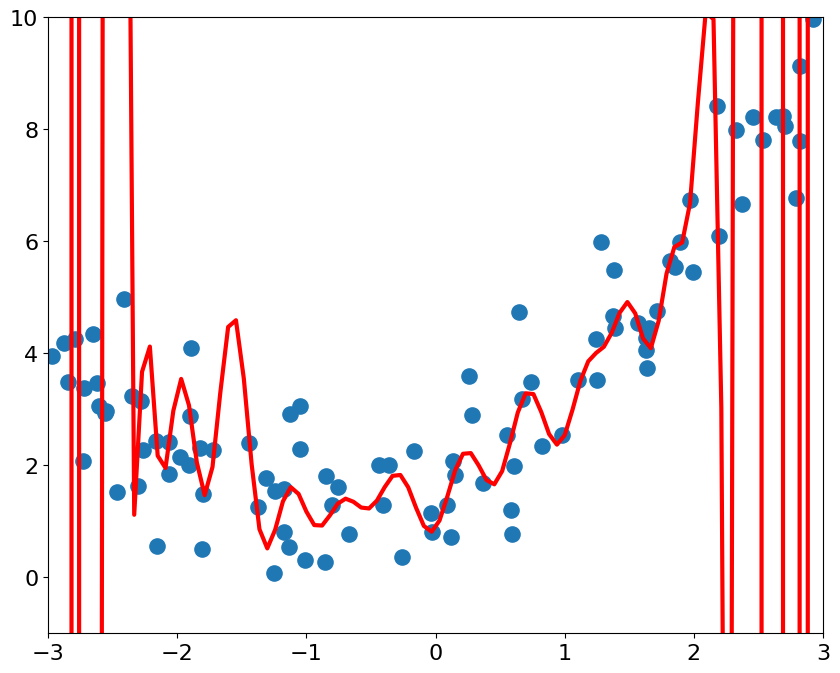

In [51]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly100_reg.predict(X_plot)
plt.figure(figsize=(10, 8))
plt.scatter(x, y, s=120)
plt.plot(X_plot[:, 0], y_plot, color='r', linewidth=3)
plt.axis([-3, 3, -1, 10])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [46]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_predict = lin_reg.predict(X_test)
print(mean_squared_error(y_test, y_predict))

3.755594371740188


In [47]:
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X_train, y_train)
y2_predict = poly2_reg.predict(X_test)
print(mean_squared_error(y_test, y2_predict))

1.103388026528141


In [48]:
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X_train, y_train)
y10_predict = poly10_reg.predict(X_test)
print(mean_squared_error(y_test, y10_predict))

1.5723694744536605


In [49]:
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X_train, y_train)
y100_predict = poly100_reg.predict(X_test)
print(mean_squared_error(y_test, y100_predict))

4.484593683273234e+17


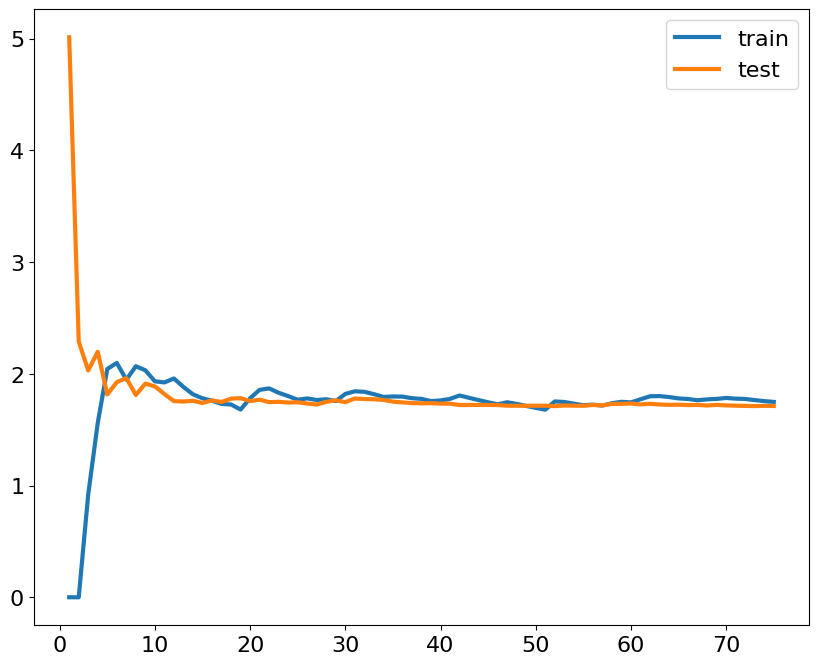

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

train_score = []
test_score = []

for i in range(1, 76):
    lin_reg = LinearRegression()
    lin_reg.fit(X_train[:i], y_train[:i])
    
    y_train_predict = lin_reg.predict(X_train[:i])
    train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    
    y_test_predict = lin_reg.predict(X_test)
    test_score.append(mean_squared_error(y_test, y_test_predict))

plt.figure(figsize=(10, 8))    
plt.plot([i for i in range(1, 76)], np.sqrt(train_score), label='train', linewidth=3)
plt.plot([i for i in range(1, 76)], np.sqrt(test_score), label='test', linewidth=3)
plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

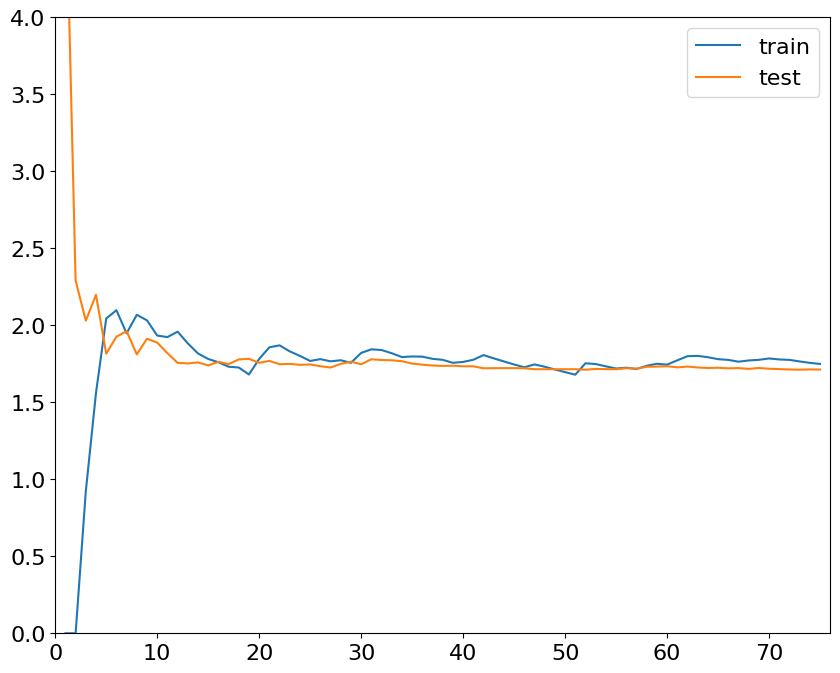

In [57]:
def plot_learning_curve(algo, X_train, X_test, y_train, y_test):
    train_score = []
    test_score = []

    for i in range(1, len(X_train) + 1):
        algo.fit(X_train[:i], y_train[:i])

        y_train_predict = algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i], y_train_predict))

        y_test_predict = algo.predict(X_test)
        test_score.append(mean_squared_error(y_test, y_test_predict))

    plt.figure(figsize=(10, 8))
    plt.plot([i for i in range(1, len(X_train) + 1)], np.sqrt(train_score), label='train')
    plt.plot([i for i in range(1, len(X_train) + 1)], np.sqrt(test_score), label='test')
    plt.axis([0, len(X_train) + 1, 0, 4])
    plt.legend(fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()
    
plot_learning_curve(LinearRegression(), X_train, X_test, y_train, y_test)

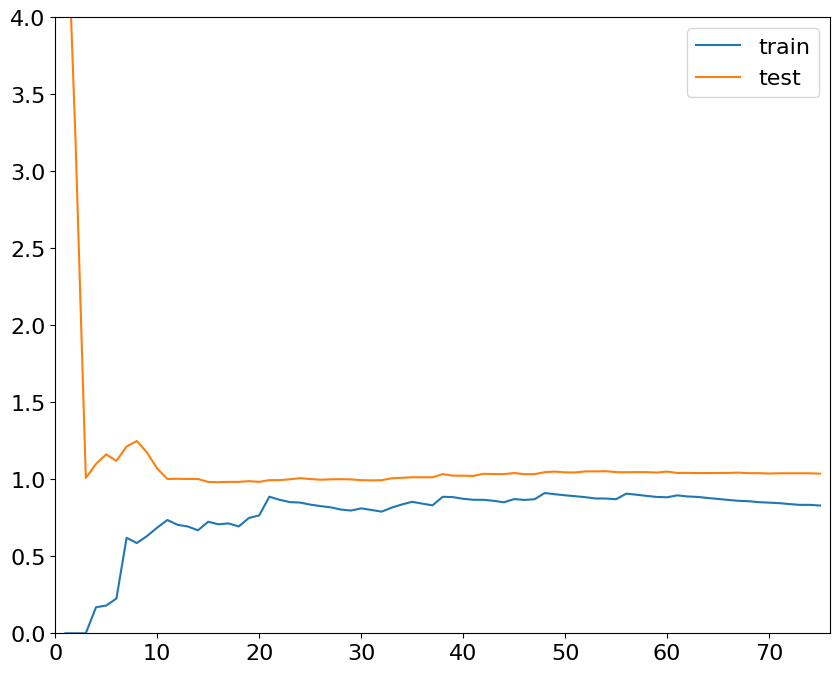

In [58]:
poly2_reg = PolynomialRegression(degree=2)
plot_learning_curve(poly2_reg, X_train, X_test, y_train, y_test)

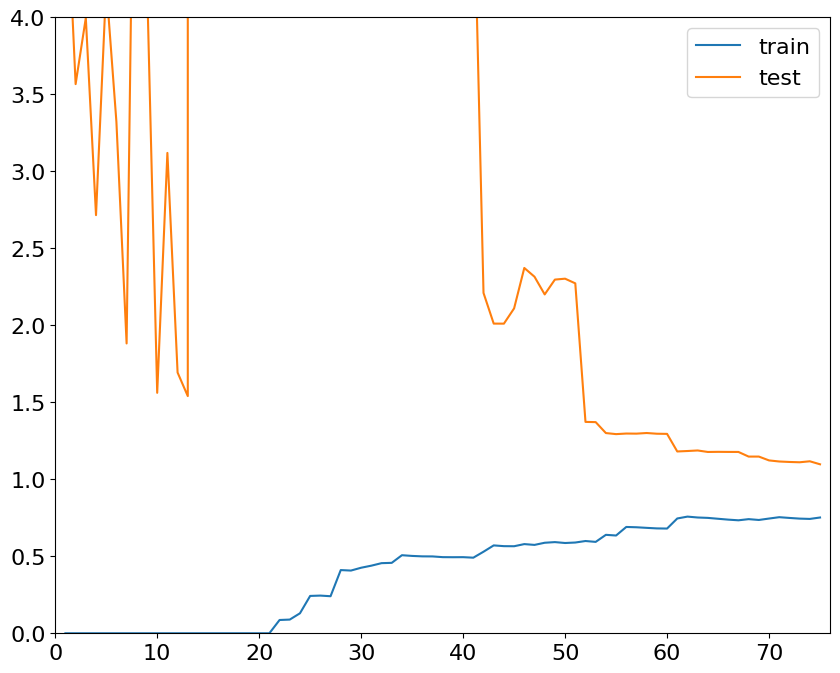

In [59]:
poly2_reg = PolynomialRegression(degree=20)
plot_learning_curve(poly2_reg, X_train, X_test, y_train, y_test)

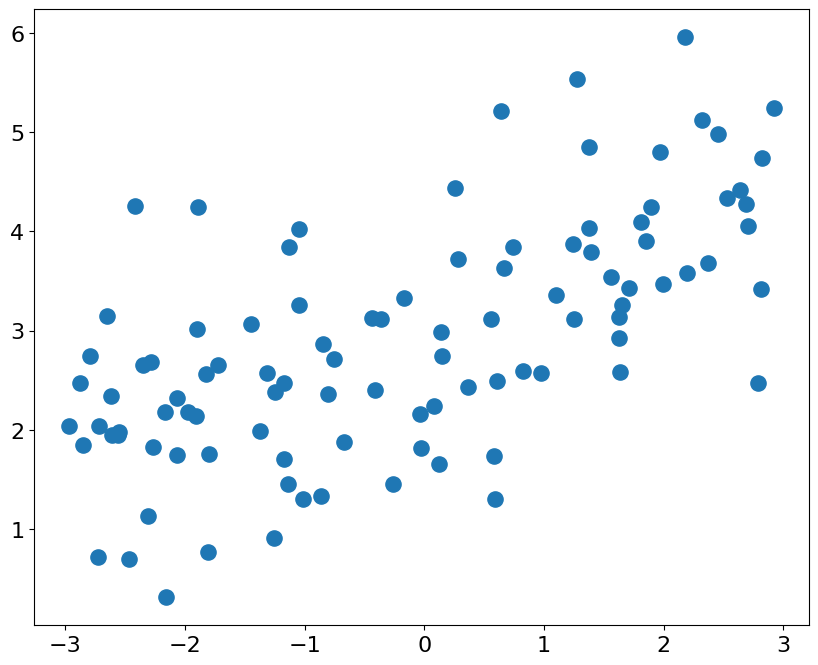

In [63]:
np.random.seed(42)
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x + 3 + np.random.normal(0, 1, 100)

plt.figure(figsize=(10, 8))
plt.scatter(x, y, s=120)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [67]:
lin_reg = LinearRegression()

def PolynomialRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('lin_reg', lin_reg)
    ])

np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(X, y)

poly10_reg = PolynomialRegression(degree=20)
poly10_reg.fit(X_train, y_train)
y10_predict = poly10_reg.predict(X_test)
mean_squared_error(y_test, y10_predict)

167.9401086935821

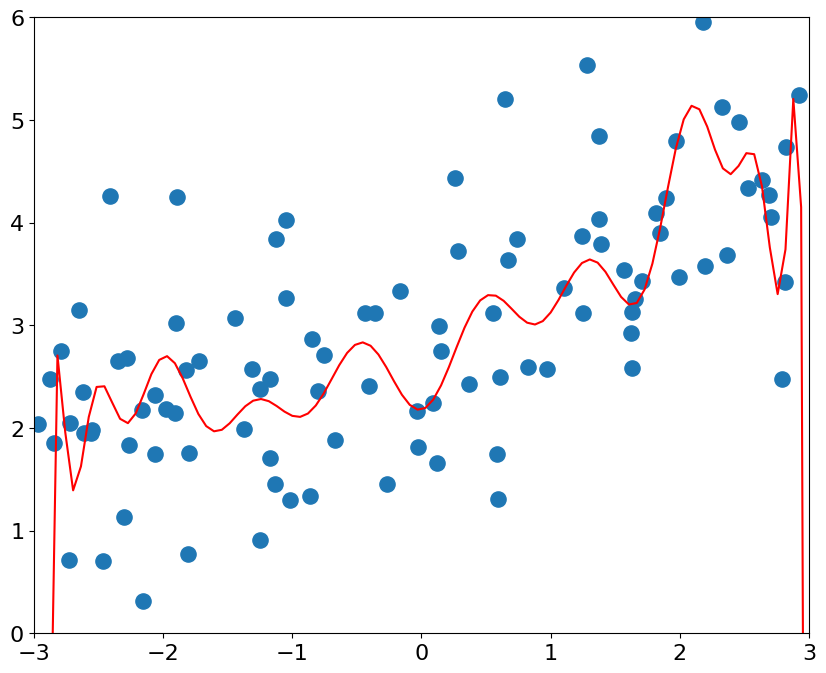

In [69]:
def plot_model(model):
    X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
    y_plot = model.predict(X_plot)
    plt.figure(figsize=(10, 8))
    plt.scatter(x, y, s=120)
    plt.plot(X_plot[:, 0], y_plot, color='r')
    plt.axis([-3, 3, 0, 6])
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()

plot_model(poly10_reg)

In [76]:
lin_reg.coef_

array([ 0.00000000e+00,  4.51420571e-01,  2.33356109e+01,  1.42846232e+01,
       -6.53846205e+02, -2.53385003e+02,  7.60081201e+03,  2.36383160e+03,
       -4.66569540e+04, -1.22026494e+04,  1.67921957e+05,  3.63834773e+04,
       -3.72244181e+05, -6.41186496e+04,  5.14730776e+05,  6.58881348e+04,
       -4.32752964e+05, -3.64946916e+04,  2.02479125e+05,  8.42103403e+03,
       -4.04490051e+04])

In [77]:
from sklearn.linear_model import Ridge

def RidgeRegression(degree, alpha):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('ridge_reg', Ridge(alpha=alpha))
    ])

ridge1_reg = RidgeRegression(20, 0.0001)
ridge1_reg.fit(X_train, y_train)
y1_predict = ridge1_reg.predict(X_test)
mean_squared_error(y_test, y1_predict)

1.3233492754132186

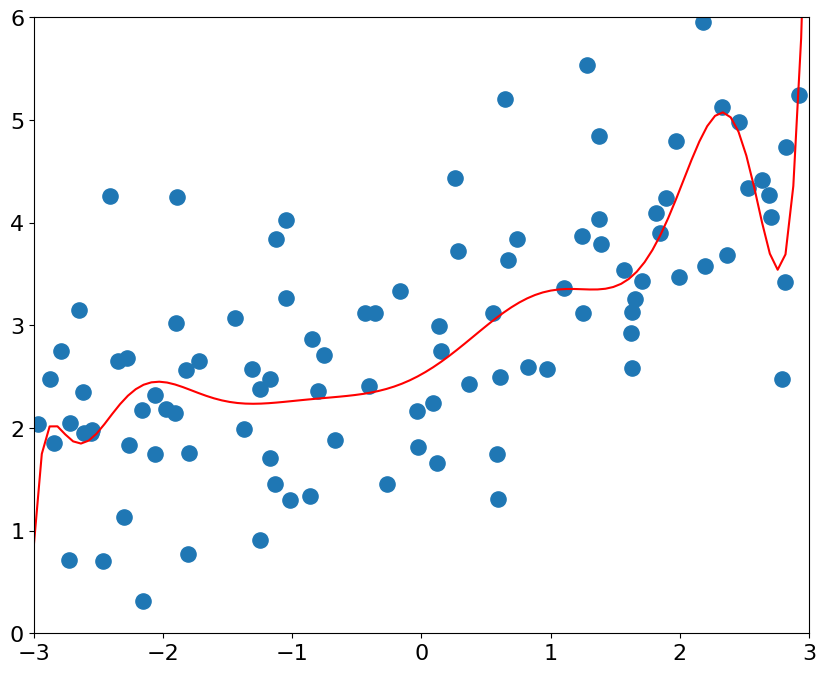

In [78]:
plot_model(ridge1_reg)

1.1888759304218441


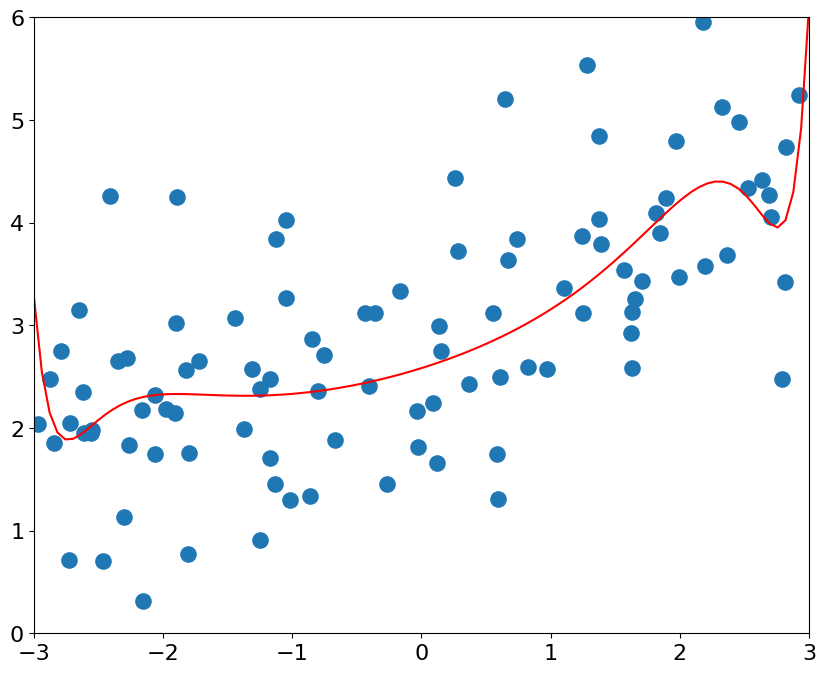

In [79]:
ridge2_reg = RidgeRegression(20, 1)
ridge2_reg.fit(X_train, y_train)
y2_predict = ridge2_reg.predict(X_test)
print(mean_squared_error(y_test, y2_predict))
plot_model(ridge2_reg)

1.3196456113086197


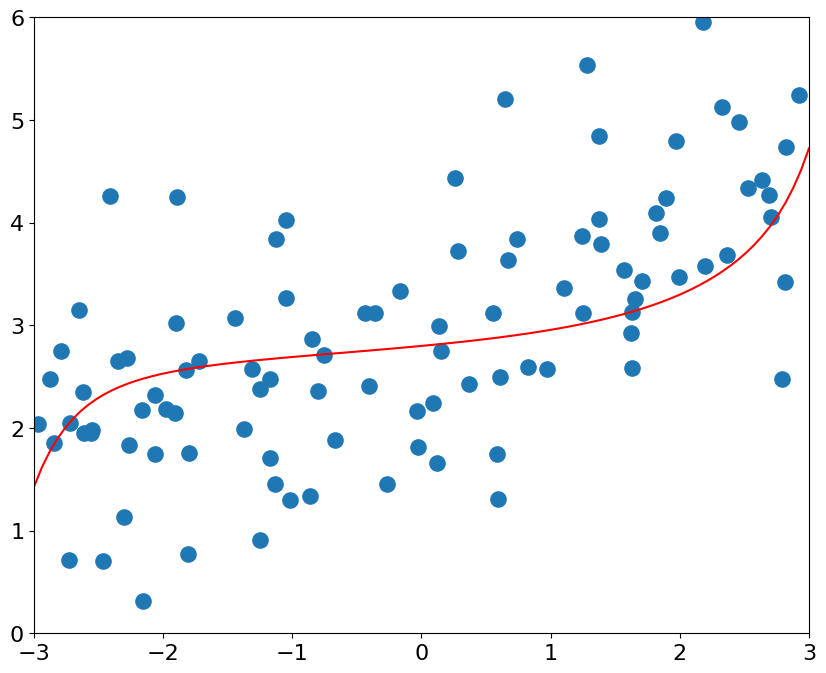

In [80]:
ridge3_reg = RidgeRegression(20, 100)
ridge3_reg.fit(X_train, y_train)
y3_predict = ridge3_reg.predict(X_test)
print(mean_squared_error(y_test, y3_predict))
plot_model(ridge3_reg)

1.8404103153255003


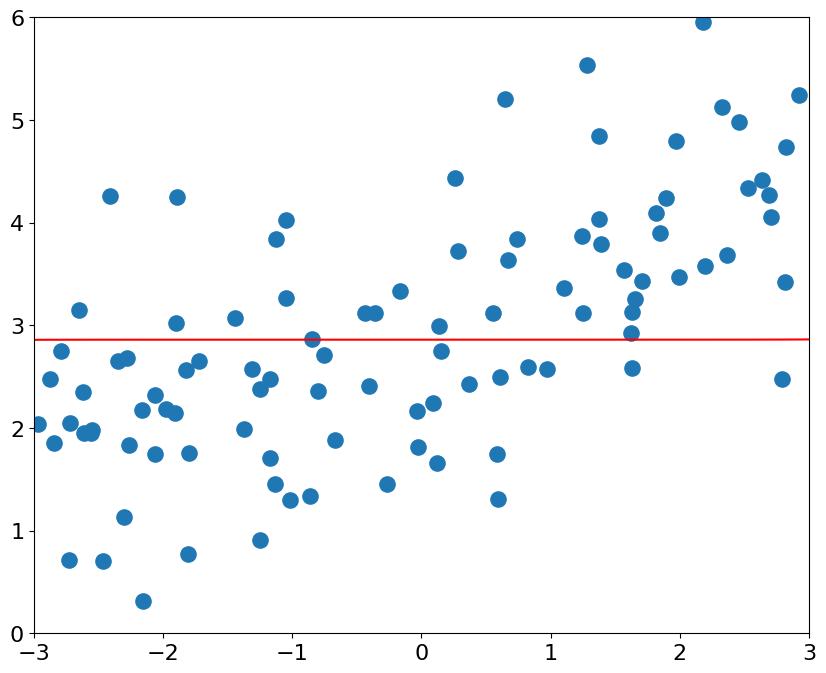

In [81]:
ridge4_reg = RidgeRegression(20, 1000000)
ridge4_reg.fit(X_train, y_train)
y4_predict = ridge4_reg.predict(X_test)
print(mean_squared_error(y_test, y4_predict))
plot_model(ridge4_reg)

1.1496080843259964


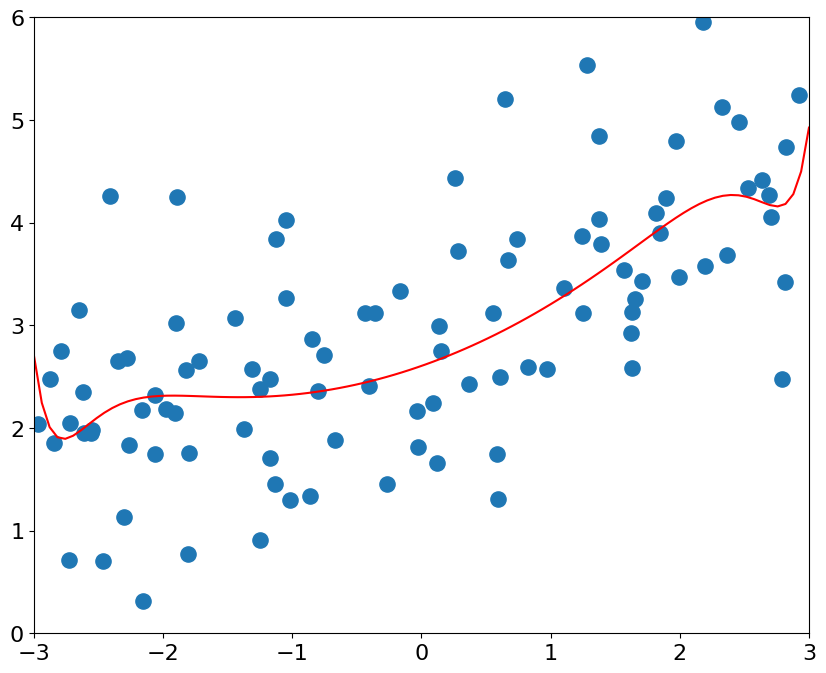

In [84]:
from sklearn.linear_model import Lasso

def LassoRegression(degree, alpha):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('lasso_reg', Lasso(alpha=alpha))
    ])

lasso1_reg = LassoRegression(20, 0.01)
lasso1_reg.fit(X_train, y_train)
y1_predict = lasso1_reg.predict(X_test)
print(mean_squared_error(y_test, y1_predict))
plot_model(lasso1_reg)

1.1213911351818648


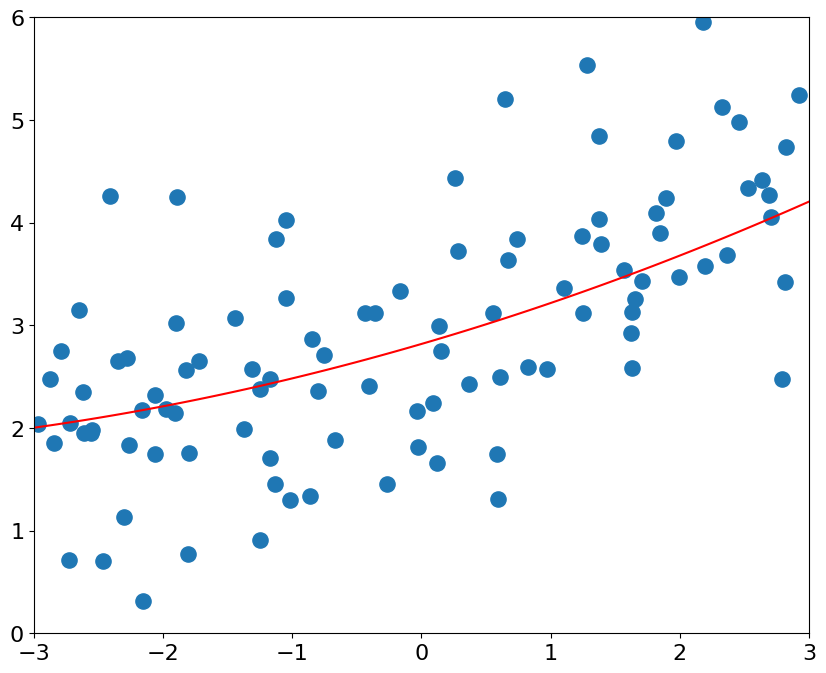

In [85]:
lasso2_reg = LassoRegression(20, 0.1)
lasso2_reg.fit(X_train, y_train)
y2_predict = lasso2_reg.predict(X_test)
print(mean_squared_error(y_test, y2_predict))
plot_model(lasso2_reg)

1.8408939659515595


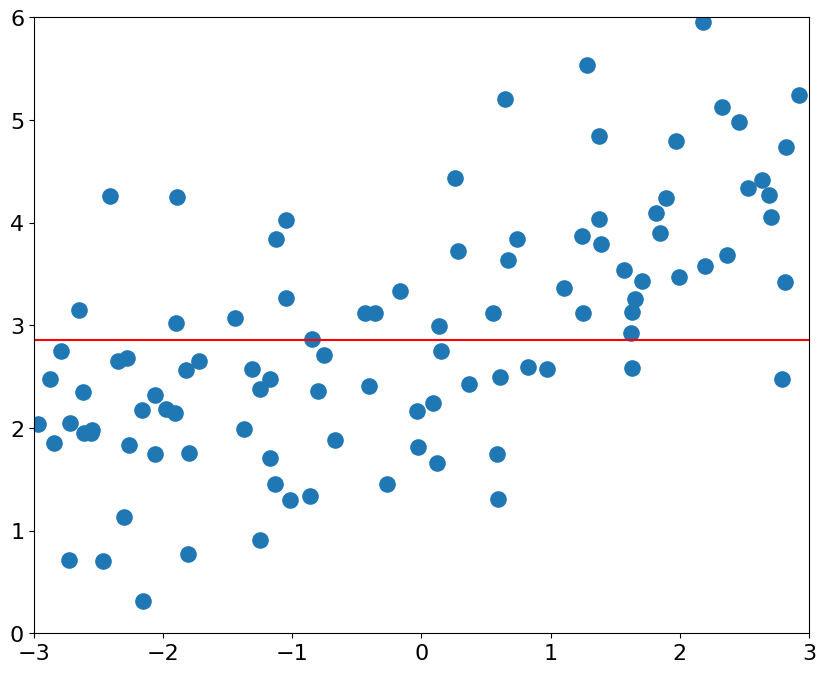

In [87]:
lasso3_reg = LassoRegression(20, 1)
lasso3_reg.fit(X_train, y_train)
y3_predict = lasso3_reg.predict(X_test)
print(mean_squared_error(y_test, y3_predict))
plot_model(lasso3_reg)